## (10%) Can you name the main innovations in AlexNet, compared to LeNet-5? What about the main innovations in GoogLeNet and ResNet?

AlexNet (2012, ILSVRC) has a similar framework as the LeNet-5. However, instead of average pooling, the AlexNet uses the max-pooling. It also used the ReLU instead of sigmoid/tanh activation functions.  
AlexNet used the GPU to train its model.

GoogLeNet (2014, ILSVRC) used the inception module where each module has parallel paths with different receptive field sizes and operations. The main innovation in ResNet (2015, ILSVRC) was the "depth" of the the architecture. ResNet has 152 layers compared to the GoogLeNet that has 22 layers.

## (50%) Improve Model Performance with Image Augmentation. At this assignment, you will learn 

1. About the image augmentation API provided by Keras and how to use it with your models.  
2. How to perform feature standardization.  
3. How to perform ZCA whitening of your images.  
4. How to augment data with random rotations, shifts and flips of images.  
5. How to save augmented image data to disk.  


## (a) Comparison Image Preparation. Let's take a look at the first 9 images in the training dataset from keras.


Keras offers its built-in datasets from MNIST dtasets to CIFAR-10 datasets.  

I will use the MNIST handwriting daasets for this task.

In [1]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


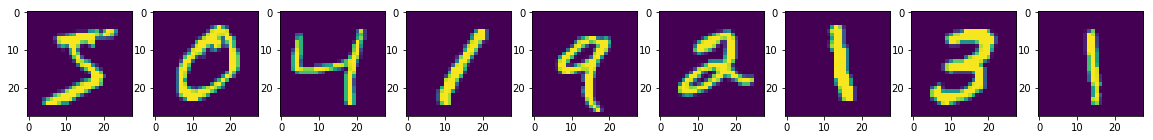

In [2]:
#get matplotlib to show the image
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(20, 20))
columns = 9
rows = 1
for i in range(0, columns*rows):
    img = x_train[i]
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)
plt.show()

## (b) Standardize images across the dataset. In this case each image is considered a feature. You can perform feature standardization by setting the featurewise center and featurewise std normalization arguments on the ImageDataGenerator class.

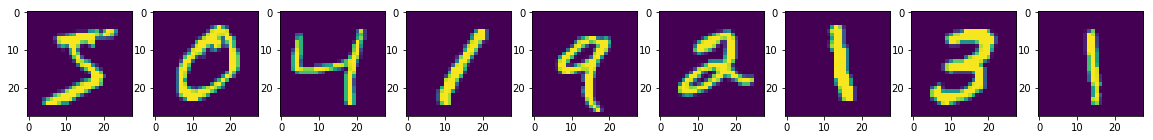

In [31]:
# https://keras.io/preprocessing/image/
from keras.preprocessing.image import ImageDataGenerator

# ValueError: Input to '.fit()' should have rank 4.
x_train_converted = x_train.reshape(x_train.shape[0], 1, 28, 28)

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True)

datagen.fit(x_train_converted)

fig = plt.figure(figsize=(20, 20))

for x_batch, y_batch in datagen.flow(x_train_converted, y_train, shuffle=False):
    for i in range(0, 9):
        img = x_batch[i].reshape(28,28)
        fig.add_subplot(1, 9, i+1)
        plt.imshow(img)
    break
plt.show()

## (c) A whitening transform of an image is a linear algebra operation that reduces the redundancy in the matrix of pixel images. Less redundancy in the image is intended to better highlight the structures and features in the image to the learning algorithm. Typically, image whitening is performed using the Principal Component Analysis (PCA) technique. More recently, an alternative called ZCA ( See Krizhevsky, 2009, Learning Multiple Layers of Features from Tiny Images) shows better results and results in transformed images that keeps all of the original dimensions and unlike PCA, resulting transformed images still look like their originals. Can you do ZCA whitening transform with keras preprocessing ?

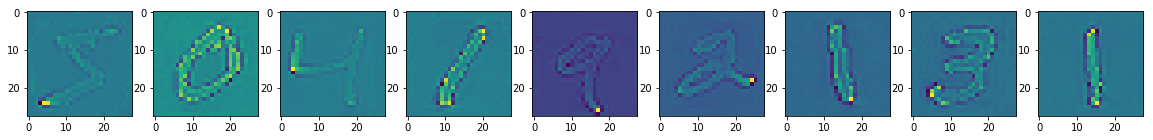

In [33]:
# ValueError: Input to '.fit()' should have rank 4.
x_train_converted = x_train.reshape(x_train.shape[0], 1, 28, 28)

# zca_whitening = True argument will enable zca whitening
datagen = ImageDataGenerator(zca_whitening=True)

datagen.fit(x_train_converted)

fig = plt.figure(figsize=(20, 20))

for x_batch, y_batch in datagen.flow(x_train_converted, y_train, shuffle=False):
    for i in range(0, 9):
        img = x_batch[i].reshape(28,28)
        fig.add_subplot(1, 9, i+1)
        plt.imshow(img)
    break
plt.show()

## (d) Sometimes images in your sample data may have varying and different rotations in the scene. You can train your model to better handle rotations of images by artificially and randomly rotating images from your dataset during training.

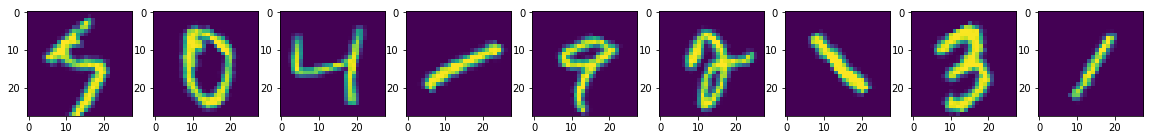

In [45]:
# ValueError: Input to '.fit()' should have rank 4.
x_train_converted = x_train.reshape(x_train.shape[0], 1, 28, 28)

# rotation_range gives each image random rotation angle between 0 to a given value
# i.e. rotation_range=45 ->  angle between [0,45]
datagen = ImageDataGenerator(rotation_range=45)

datagen.fit(x_train_converted)

fig = plt.figure(figsize=(20, 20))

for x_batch, y_batch in datagen.flow(x_train_converted, y_train, shuffle=False):
    for i in range(0, 9):
        img = x_batch[i].reshape(28,28)
        fig.add_subplot(1, 9, i+1)
        plt.imshow(img)
    break
plt.show()

## (e) Objects in your images may not be centered in the frame. They may be off-center in a variety of difrent ways. You can train your deep learning network to expect and currently handle off-center objects by artificially creating shifted versions of your training data. Try to implement it with keras.

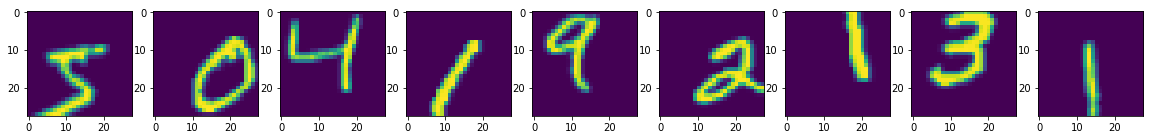

In [55]:
# ValueError: Input to '.fit()' should have rank 4.
x_train_converted = x_train.reshape(x_train.shape[0], 1, 28, 28)

# width_shift_range=0.2 -> possible values are floats in the half-open interval [-0.2, +0.2[
# height_shift_range=0.2 -> possible values are floats in the half-open interval [-0.2, +0.2[
datagen = ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.2)

datagen.fit(x_train_converted)

fig = plt.figure(figsize=(20, 20))
for x_batch, y_batch in datagen.flow(x_train_converted, y_train, shuffle=False):
    for i in range(0, 9):
        img = x_batch[i].reshape(28,28)
        fig.add_subplot(1, 9, i+1)
        plt.imshow(img)
    break
plt.show()

## (f) Another augmentation to your image data that can improve performance on large and complex problems is to create random flips of images in your training data. Implement it with keras.

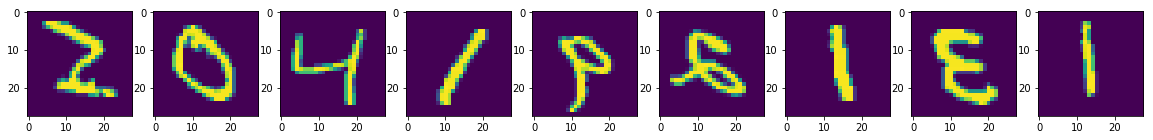

In [94]:
# ValueError: Input to '.fit()' should have rank 4.
x_train_converted = x_train.reshape(x_train.shape[0], 1, 28, 28)

# horizontal flip = True -> randomly flips an input horizontally
# vertical flip = True -> randomly flips an input vertically
datagen = ImageDataGenerator(
    horizontal_flip = True,
    vertical_flip = True)

datagen.fit(x_train_converted)

fig = plt.figure(figsize=(20, 20))
for x_batch, y_batch in datagen.flow(x_train_converted, y_train, shuffle=False):
    for i in range(0, 9):
        img = x_batch[i].reshape(28,28)
        fig.add_subplot(1, 9, i+1)
        plt.imshow(img)
    break
plt.show()

## (g) By appling these augmented techniques to increase the training set size, then compare with your first HW for same model. See whether your accuracy can be improved with augmented traning set.

In [96]:
import tensorflow as tf
from tensorflow import keras

# preprocess data from 0-255 scale to 0-1 scale
train_images = x_train / 255.0
test_images = x_test / 255.0

train_images_converted = train_images.reshape(train_images.shape[0],28,28,1)

print(train_images_converted.shape)

# applying all augmentation techniques
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip = True,
    vertical_flip = True)

#create model
cnn_model = keras.Sequential()
#add model layers
cnn_model.add(keras.layers.Conv2D(64, kernel_size=3, activation=tf.nn.relu, input_shape=(28,28,1)))
cnn_model.add(keras.layers.Conv2D(32, kernel_size=3, activation=tf.nn.relu))
cnn_model.add(keras.layers.Flatten())
cnn_model.add(keras.layers.Dense(10, activation=tf.nn.softmax))

# compile settings
cnn_model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

(60000, 28, 28, 1)


In [99]:
# fits the model on batches with real-time data augmentation:
cnn_model.fit_generator(datagen.flow(train_images_converted, y_train, batch_size=32),
                    steps_per_epoch=len(train_images_converted) / 32, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 125s 66ms/step - loss: 0.1190 - acc: 0.9621
Epoch 2/3
1875/1875 [==============================] - 135s 72ms/step - loss: 0.1115 - acc: 0.9646
Epoch 3/3
1875/1875 [==============================] - 139s 74ms/step - loss: 0.1071 - acc: 0.9658


In [100]:
# let's test our trained model how it works on test samples
test_loss, test_acc = cnn_model.evaluate(x_test.reshape(x_test.shape[0],28,28,1), y_test)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 6s 630us/sample - loss: 0.7235 - acc: 0.9541
Test accuracy: 0.9541


HW1's CNN model's test accuracy = 0.9836  
HW2's CNN model (with augementations) test accuracy = 0.9541

I was thinking why the model with augmented dataset has lower accuracy.  
Then, I realized the test sets do not have images that are either horizontally or vertically flipped.  
Let's make augmented dataset without flips enabled.

In [103]:
train_images_converted2 = train_images.reshape(train_images.shape[0],28,28,1)

print(train_images_converted2.shape)

# applying all augmentation techniques
datagen2 = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20, #changing from 45 to 20 since the test sets are not much rotated.
    width_shift_range=0.2,
    height_shift_range=0.2)

(60000, 28, 28, 1)


In [104]:
# fits the model on batches with real-time data augmentation:
cnn_model.fit_generator(datagen2.flow(train_images_converted2, y_train, batch_size=32),
                    steps_per_epoch=len(train_images_converted2) / 32, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 133s 71ms/step - loss: 0.2022 - acc: 0.9389
Epoch 2/3
1875/1875 [==============================] - 140s 75ms/step - loss: 0.0870 - acc: 0.9738
Epoch 3/3
1875/1875 [==============================] - 151s 80ms/step - loss: 0.0684 - acc: 0.9790


In [105]:
# let's test our trained model how it works on test samples
test_loss, test_acc = cnn_model.evaluate(x_test.reshape(x_test.shape[0],28,28,1), y_test)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 6s 625us/sample - loss: 0.4497 - acc: 0.9716
Test accuracy: 0.9716


Removing horizontal/vertical flipped augmentations + rotation_range = 20 have resulted in increasing nearly 2% of the accuracy.  
The final accuracy = 0.9716

## (40%) A difficult problem where traditional neural networks fall down is called object recognition. It is where a model is able to identify objects in images. In this lesson you will discover how to develop and evaluate deep learning models for object recognition in Keras. After completing this assignment, you will know:
1. About the CIFAR-10 object recognition dataset and how to load and use it in Keras.
2. How to create a Convolutional Neural Network for object recognition.
3. How to lift performance by creating deeper Convolutional Neural Networks.

## (a) The CIFAR-10 dataset can easily be loaded in Keras. Keras has the facility to automatically download standard datasets like CIFAR-10 and store them in the ~/.keras/datasets directory using the cifar10.load data() function.

In [107]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train.shape

170500096/170498071 [==============================] - 99s 1us/step


(50000, 3, 32, 32)

In [121]:
x_test.shape

(10000, 3, 32, 32)

We have 50000 images for training with RGB channels (3) with image width (32) and height (32).  
Also, there are 10000 images with same dimensions and channels for testing our model.

In [129]:
# mainly referenced from https://keras.io/examples/cifar10_cnn/

# CIFAR-10 datasets have 10 classes in total.
num_classes = 10

# Convert class vectors to binary class matrices. (one-hot-encoding)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [205]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

Output values have been converted from integer (0-9) to binary.

## (b) Could you design a CNN with two convolutional hidden layers and dropout model? Then apply this to do objet recognition task. You may deeper your CNN to see how performance get improved.

2 conv layers + dropout model

In [206]:
# model declaration
model_2conv = keras.Sequential()
model_2conv.add(keras.layers.Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:], data_format='channels_first'))
model_2conv.add(keras.layers.Activation('relu'))
model_2conv.add(keras.layers.Conv2D(32, (3,3)))
model_2conv.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model_2conv.add(keras.layers.Dropout(0.5))
model_2conv.add(keras.layers.Flatten())
model_2conv.add(keras.layers.Dense(512))
model_2conv.add(keras.layers.Activation('relu'))
model_2conv.add(keras.layers.Dense(num_classes))
model_2conv.add(keras.layers.Activation('softmax'))

In [207]:
model_2conv.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [208]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [209]:
model_2conv.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_test, y_test), shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20


InvalidArgumentError: Conv2DCustomBackpropFilterOp only supports NHWC.
	 [[{{node training_24/Adam/gradients/conv2d_54/Conv2D_grad/Conv2DBackpropFilter}}]]